# Assignment 3

**Your name:** Mynhardt     <br>


### Step 1: Import Python Libraries.

The first step involved in ML using Python is understanding and playing around with our data
using libraries. Here are the links to the data sets:

1. New York City Airbnb Open Data: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data
2. Climate Weather Surface of Brazil: https://www.kaggle.com/datasets/PROPPG-PPG/hourly-weather-surface-brazil-southeast-region
3. Hotel booking demand: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

**For the examples I will use: AB_NYC_2019.csv**

Import all libraries which are required for our analysis, such as Data Loading, Statistical analysis,
Visualizations, Data Transformations, Merge and Joins, etc.

* Pandas and Numpy have been used for Data Manipulation and numerical Calculations
* Matplotlib and Seaborn have been used for Data visualizations.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sqlite3

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Step 2: Reading Dataset

The Pandas library provides extensive functionality for importing data into a pandas DataFrame from various file types such as .csv, JSON, .xlsx, .sql, .pickle, .html, .txt, and images.

CSV files are commonly used due to their simplicity and ease of use. By employing the read_csv() function, data from these files can be easily transformed into a pandas DataFrame.

#### Reading CSV Files:

* Function: pd.read_csv()

* Common Parameters:

    * filepath_or_buffer: Specify the file path or object.
    * sep: Delimiter to use (default is ,).
    * header: Row number to use as the column names.
    * index_col: Column(s) to set as index.
    * usecols: Subset of columns to read.
    * dtype: Type of data for each column.
    * parse_dates: List of columns to parse as dates.

In [6]:
df = pd.read_csv('AB_NYC_2019.csv')

#### Reading Excel Files:

* Function: pd.read_excel()

* Common Parameters:

    * io: File path or object.
    * sheet_name: String or integer for sheet name or number.
    * header: Row number to use as the column names.
    * index_col: Column to use as row labels.
    * usecols: Subset of columns to read.

In [3]:
df = pd.read_excel('AB_NYC_2019.xlsx')

#### Reading JSON Files:

* Function: pd.read_json()

* Common Parameters:

    * path_or_buf: a valid JSON string or file path.
    * orient: Indication of expected JSON string format.
    * lines: Read the file as a json object per line.

In [5]:
df = pd.read_json('AB_NYC_2019.json')

#### Reading from SQL Database:

* Function: pd.read_sql()

* Common Parameters:

    * sql: SQL query or database table name.
    * con: Database connection object.
    * index_col: Column(s) to set as index.
    * parse_dates: List of columns to parse as dates.

In [ ]:
# Load the dataset
file_path = 'AB_NYC_2019.csv'  # Ensure this path is correct
df = pd.read_csv(file_path)

# Create a SQLite connection
conn = sqlite3.connect('AB_NYC_2019.db')

# Write the DataFrame to a SQLite table named 'airbnb'
df.to_sql('airbnb', con=conn, if_exists='replace', index=False)

# Read the data back from the SQLite table
df_from_db = pd.read_sql('SELECT * FROM airbnb', con=conn)

# Display the first few rows of the DataFrame loaded from the database
print(df_from_db.head())

# Close the connection
conn.close()

### Step 3: Analyzing the Data

Before drawing any conclusions, it is crucial to thoroughly examine all variables present in the dataset. The primary objective of understanding the data is to gain a comprehensive overview, which includes assessing the number of rows and columns, the types of values, the data types, and identifying any missing values.

#### Dataset Dimensions:

*   Function: df.shape

*   Description: Returns a tuple representing the dimensions of the DataFrame (rows, columns).

In [7]:
df.shape

(48895, 16)

* head() will display the top 5 observations of the dataset

In [9]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


* tail() will display the last 5 observations of the dataset

In [10]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


* Use df.info() to get information on column data types and non-null values.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

* Use df.describe() for statistical summaries of numerical columns.

In [12]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


* Use df.dtypes Returns the data type of each column.

In [13]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### Check for Duplication

Using the unique() and nunique() function to count the number of unique values in each column, along with examining the data description, allows us to distinguish between continuous and categorical columns. Based on further analysis, we can decide how to manage or eliminate duplicate data.

In [14]:
# Display unique values in the 'room_type' column
unique_room_types = df['room_type'].unique()
print("Unique values in 'room_type' column:")
print(unique_room_types)

Unique values in 'room_type' column:
['Private room' 'Entire home/apt' 'Shared room']


In [15]:
unique_counts = df.nunique()
print(unique_counts)

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64


### Step 4: Cleaning of Data set

Cleaning a dataset is a critical phase in data preparation, ensuring the quality and reliability of subsequent data analysis. This aspect involves dealing with missing values, correcting data errors, and removing irrelevant data fields.

#### Handling Missing Values:

The isnull() function is commonly utilized in pre-processing steps to detect null values within the dataset. In our specific case, data.isnull().sum() is employed to count the number of missing entries in each column.

* Function: df.isnull() or df.isna()

* Common Parameters:

    * These functions return a boolean DataFrame indicating where values are missing.

In [16]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n")
print(missing_values)

Missing values in each column:

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


* The below code helps to calculate the percentage of missing values in each column

In [17]:
(df.isnull().sum()/(len(df)))*100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

#### Strategies for Handling Missing Data:

* Deletion:
    * Function: df.dropna()
    * Use Case: Best used when the dataset is large or when the rows with missing values are negligible.

In [18]:
# Deleting rows with any missing values
df_dropped = df.dropna()

# Display the number of rows before and after deletion
print(f"Original number of rows: {len(df)}")
print(f"Number of rows after deletion: {len(df_dropped)}")

Original number of rows: 48895
Number of rows after deletion: 38821


* Imputation:
    * Numeric Data: Mean, median, or mode replacement.

* Numerical Data Imputation
    * Imputing missing numerical values with the mean:

In [19]:
# Numerical Data Imputation
df['price'] = df['price'].fillna(df['price'].mean())
print(df['price'].isnull().sum())

0


* Categorical Data Imputation
    * Imputing missing categorical values with the most frequent value:

In [20]:
# Categorical Data Imputation
df['room_type'] = df['room_type'].fillna(df['room_type'].mode()[0])
print(df['room_type'].isnull().sum())

0


#### Handling Time Series Data

* Forward fill and backward fill methods for time series data:

In [21]:
# Assume 'last_review' is a date column
df['last_review'] = pd.to_datetime(df['last_review'])

# Forward fill missing values
df['last_review_ffill'] = df['last_review'].fillna(method='ffill')

# Backward fill missing values
df['last_review_bfill'] = df['last_review'].fillna(method='bfill')

# Display the number of missing values after forward and backward fill
print(df['last_review_ffill'].isnull().sum())
print(df['last_review_bfill'].isnull().sum())

0
42


#### Fixing Inconsistent Data Entries
* Standardize categorical entries to ensure consistency, such as fixing capitalization issues:

In [22]:
# Fixing inconsistent data entries in 'room_type' column
df['room_type'] = df['room_type'].str.lower().str.strip()

# Check unique values to verify consistency
print(df['room_type'].unique())

['private room' 'entire home/apt' 'shared room']


### Step 5: Visualization

Visualization is a key step in data analysis as it helps uncover patterns, trends, and insights that are not easily identifiable in raw data. We'll use various Python libraries like Matplotlib and Seaborn to visualize the NYC Airbnb dataset.

In [23]:
# Set style for the plots
sns.set(style="whitegrid")

* Histogram: Helps in understanding the distribution and spread of 'price' values.

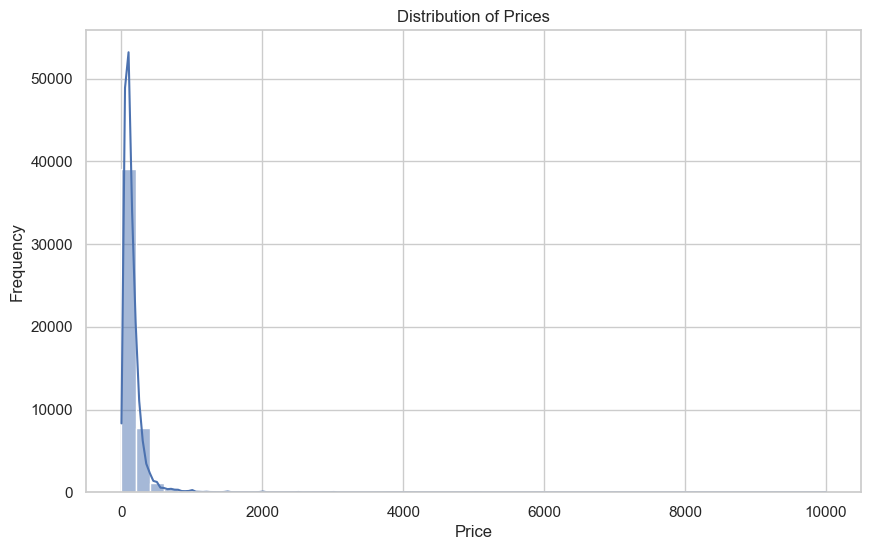

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

* Box Plot: To identify outliers in the 'price' column.

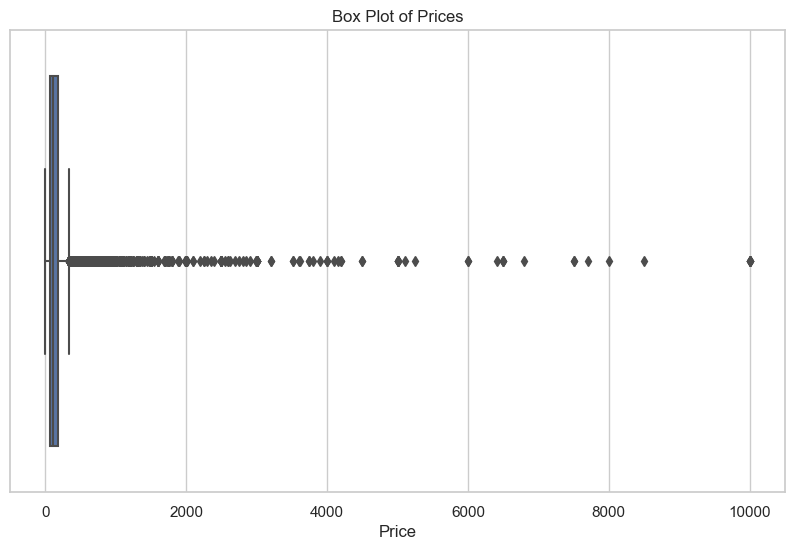

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Prices')
plt.xlabel('Price')
plt.show()

* Scatter Plot: Shows the relationship between 'price' and 'minimum_nights', indicating if higher prices are associated with longer or shorter stays.

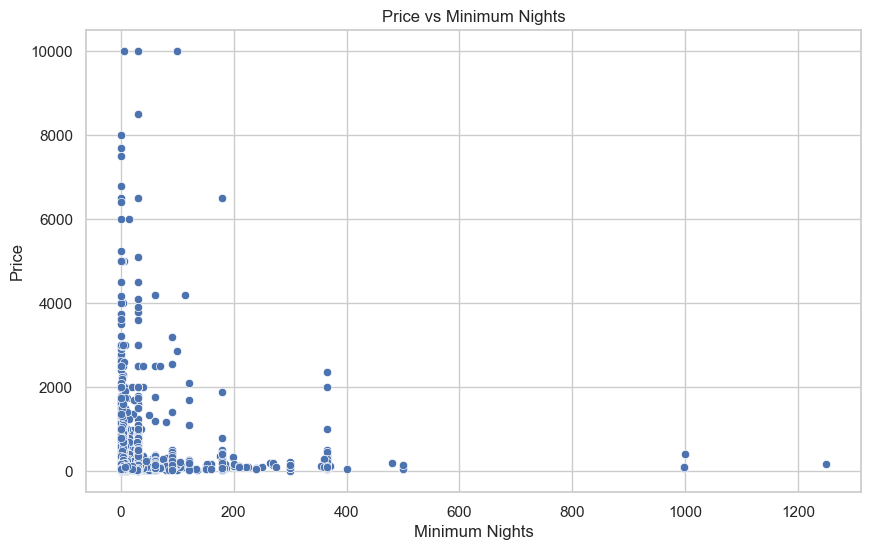

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='minimum_nights', y='price', data=df)
plt.title('Price vs Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.show()

* Count Plot: Displays the count of each room type in the dataset, providing insights into the distribution of different types of accommodations.

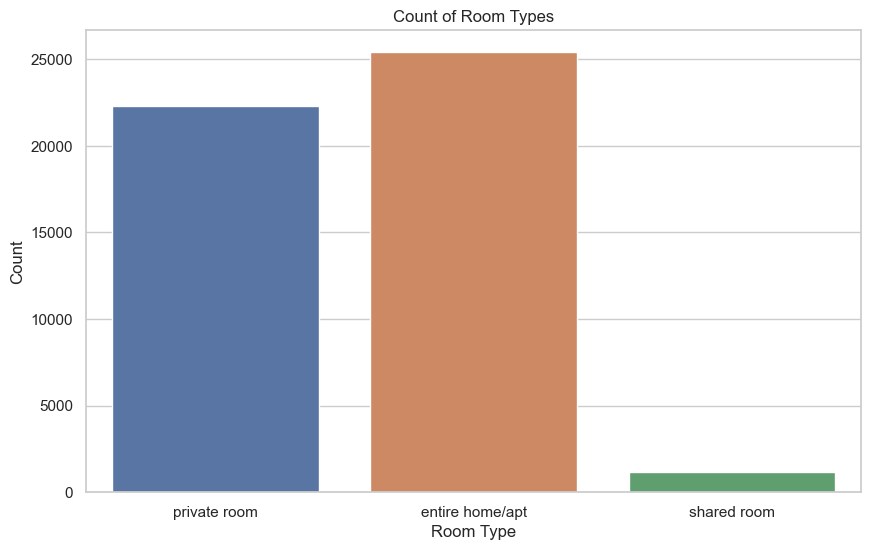

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type', data=df)
plt.title('Count of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

### Step 6: Correlation

Performing Correlation Analysis - Ways of Testing and Displaying Correlation
Correlation analysis is fundamental in statistical data analysis to measure the extent to which two variables fluctuate together. A well-conducted correlation analysis can provide insights into the degree of association between variables.

* Pearson Correlation Coefficient:

    * Function: DataFrame.corr(method='pearson') in pandas
    * Usage: Measures the linear relationship between two continuous variables.
    

* Spearman’s Rank Correlation:

    * Function: DataFrame.corr(method='spearman')
    * Usage: Non-parametric measure of rank correlation, suitable for non-linear relationships and ordinal data.
    
* Kendall’s Tau:

    * Function: DataFrame.corr(method='kendall')
    * Usage: A non-parametric measure that assesses the strength of dependency between two variables.

In [28]:
# Load the dataset
file_path = 'AB_NYC_2019.csv'  # Ensure this path is correct
df = pd.read_csv(file_path)

# Select only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Compute Pearson correlation matrix
pearson_corr = numerical_df.corr(method='pearson')

# Compute Spearman correlation matrix
spearman_corr = numerical_df.corr(method='spearman')

# Compute Kendall's Tau correlation matrix
kendall_corr = numerical_df.corr(method='kendall')

# Function to plot heatmaps
def plot_heatmap(corr_matrix, title):
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(title)
    plt.show()

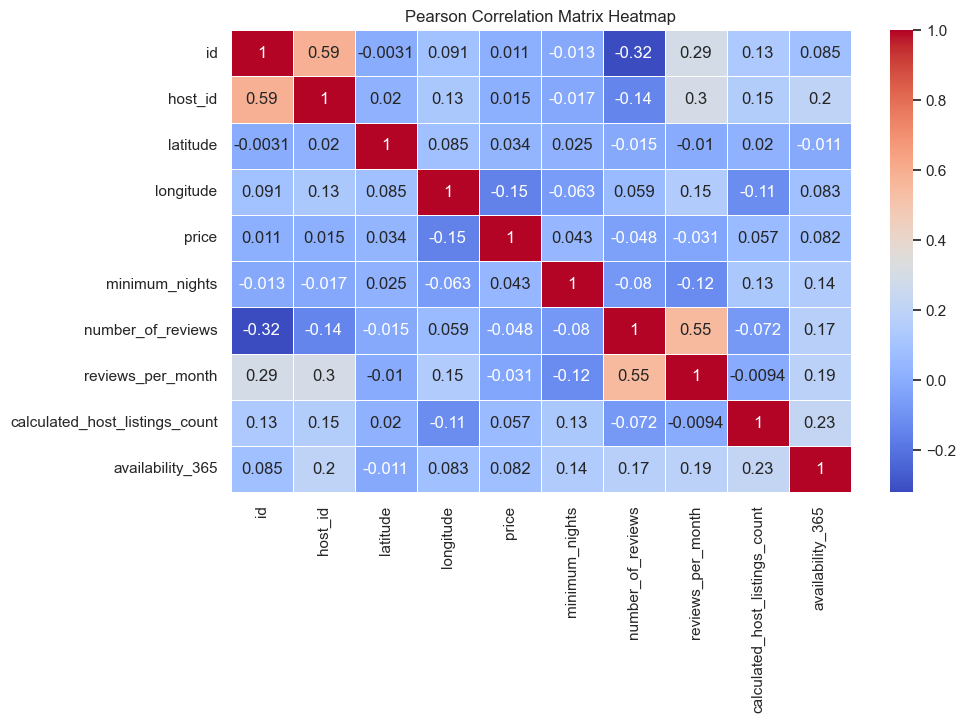

Pearson Correlation Matrix:
                                       id   host_id  latitude  longitude  \
id                              1.000000  0.588290 -0.003125   0.090908   
host_id                         0.588290  1.000000  0.020224   0.127055   
latitude                       -0.003125  0.020224  1.000000   0.084788   
longitude                       0.090908  0.127055  0.084788   1.000000   
price                           0.010619  0.015309  0.033939  -0.150019   
minimum_nights                 -0.013224 -0.017364  0.024869  -0.062747   
number_of_reviews              -0.319760 -0.140106 -0.015389   0.059094   
reviews_per_month               0.291828  0.296417 -0.010142   0.145948   
calculated_host_listings_count  0.133272  0.154950  0.019517  -0.114713   
availability_365                0.085468  0.203492 -0.010983   0.082731   

                                   price  minimum_nights  number_of_reviews  \
id                              0.010619       -0.013224          

In [29]:
plot_heatmap(pearson_corr, 'Pearson Correlation Matrix Heatmap')
print("Pearson Correlation Matrix:\n", pearson_corr)

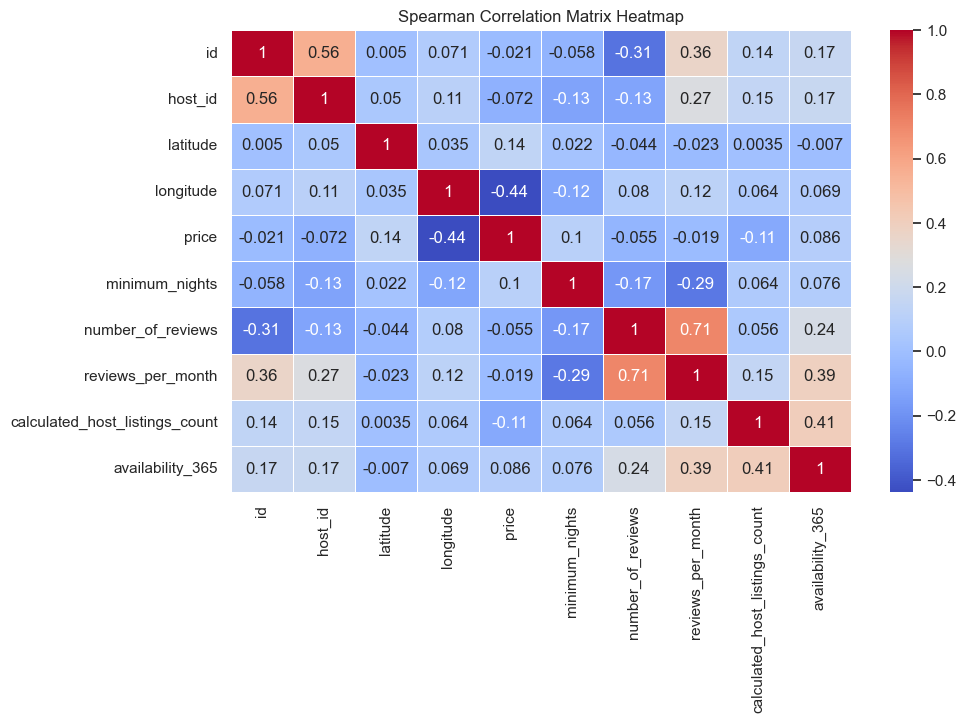


Spearman Correlation Matrix:
                                       id   host_id  latitude  longitude  \
id                              1.000000  0.558918  0.004996   0.070697   
host_id                         0.558918  1.000000  0.049621   0.108965   
latitude                        0.004996  0.049621  1.000000   0.035107   
longitude                       0.070697  0.108965  0.035107   1.000000   
price                          -0.020739 -0.071772  0.136172  -0.438035   
minimum_nights                 -0.057798 -0.130251  0.022289  -0.118921   
number_of_reviews              -0.307933 -0.128008 -0.044354   0.079847   
reviews_per_month               0.360443  0.267899 -0.023149   0.119089   
calculated_host_listings_count  0.135250  0.147273  0.003526   0.063523   
availability_365                0.165714  0.173292 -0.006962   0.068899   

                                   price  minimum_nights  number_of_reviews  \
id                             -0.020739       -0.057798        

In [30]:
plot_heatmap(spearman_corr, 'Spearman Correlation Matrix Heatmap')
print("\nSpearman Correlation Matrix:\n", spearman_corr)

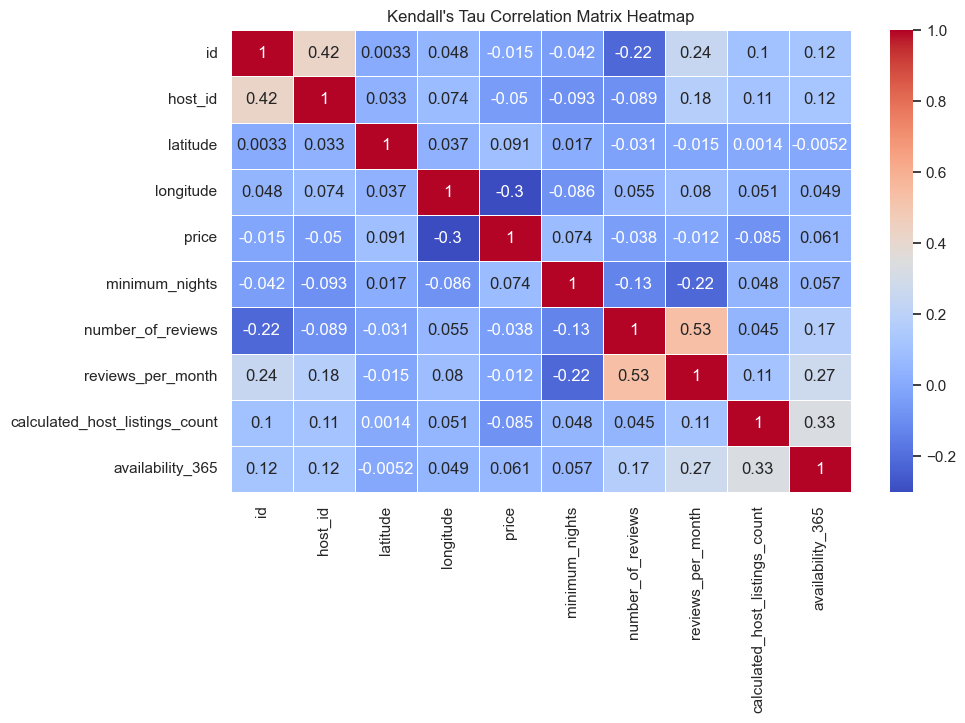


Kendall's Tau Correlation Matrix:
                                       id   host_id  latitude  longitude  \
id                              1.000000  0.420839  0.003315   0.048173   
host_id                         0.420839  1.000000  0.033103   0.074113   
latitude                        0.003315  0.033103  1.000000   0.036699   
longitude                       0.048173  0.074113  0.036699   1.000000   
price                          -0.015154 -0.049696  0.090532  -0.302361   
minimum_nights                 -0.041880 -0.093476  0.016805  -0.086497   
number_of_reviews              -0.219792 -0.088893 -0.030714   0.055079   
reviews_per_month               0.243300  0.177456 -0.015486   0.079830   
calculated_host_listings_count  0.103732  0.112193  0.001361   0.050607   
availability_365                0.119636  0.120790 -0.005180   0.048909   

                                   price  minimum_nights  number_of_reviews  \
id                             -0.015154       -0.041880   

In [31]:
plot_heatmap(kendall_corr, 'Kendall\'s Tau Correlation Matrix Heatmap')
print("\nKendall's Tau Correlation Matrix:\n", kendall_corr)

### Step 7: Handling Outliers

Outliers are observations in a dataset that deviate significantly from other observations. They can influence the results of an analysis and may indicate data entry errors, variability in a measurement, or experimental errors.

#### Statistical Methods for Detecting Outliers

* Z-score Method:

    * Function: Using scipy.stats.zscore
    * Usage: Identifies outliers in data that follows a Gaussian distribution.
    * Calculation: The Z-score is the number of standard deviations an element is from the mean. A rule of thumb is to label values with a Z-score greater than 3 or less than -3 as outliers.

In [32]:
# Choose a column to calculate z-scores and find outliers
# For demonstration, let's use the 'price' column
df['z_score'] = stats.zscore(df['price'])

# Identify outliers with z-scores greater than 3 or less than -3
outliers = df[np.abs(df['z_score']) > 3]

# Display the outliers
print(outliers.head())

# Optional: Drop the z_score column if not needed
df.drop(columns=['z_score'], inplace=True)

          id                                              name  host_id  \
496   174966             Luxury 2Bed/2.5Bath Central Park View   836168   
762   273190         6 Bedroom Landmark West Village Townhouse   605463   
946   363673                  Beautiful 3 bedroom in Manhattan   256239   
1105  468613  $ (Phone number hidden by Airbnb) weeks - room f  2325861   
1414  634353               Luxury 1Bed with Central Park Views   836168   

         host_name neighbourhood_group    neighbourhood  latitude  longitude  \
496          Henry           Manhattan  Upper West Side  40.77350  -73.98697   
762   West Village           Manhattan     West Village  40.73301  -74.00268   
946         Tracey           Manhattan  Upper West Side  40.80142  -73.96931   
1105       Cynthia           Manhattan  Lower East Side  40.72152  -73.99279   
1414         Henry           Manhattan  Upper West Side  40.77428  -73.98594   

            room_type  price  minimum_nights  number_of_reviews last

* Interquartile Range (IQR) Method:

    * Usage: Effective for skewed distributions or when data is not normally distributed.
    * Calculation: IQR is the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data. Outliers are typically any data points that fall below Q1 - 1.5IQR or above Q3 + 1.5IQR.

In [33]:
# Choose a column to calculate IQR and find outliers
# For demonstration, let's use the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = df[(df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))]

# Display the outliers
print(outliers.head())

# Optional: Count the number of outliers
print(f"Number of outliers: {outliers.shape[0]}")

        id                                               name  host_id  \
61   15396                 Sunny & Spacious Chelsea Apartment    60278   
85   19601                perfect for a family or small group    74303   
103  23686  2000 SF 3br 2bath West Village private  townhouse    93790   
114  26933  2 BR / 2 Bath Duplex Apt with patio! East Village    72062   
121  27659                   3 Story Town House in Park Slope   119588   

    host_name neighbourhood_group     neighbourhood  latitude  longitude  \
61      Petra           Manhattan           Chelsea  40.74623  -73.99530   
85     Maggie            Brooklyn  Brooklyn Heights  40.69723  -73.99268   
103       Ann           Manhattan      West Village  40.73096  -74.00319   
114     Bruce           Manhattan      East Village  40.72540  -73.98157   
121      Vero            Brooklyn       South Slope  40.66499  -73.97925   

           room_type  price  minimum_nights  number_of_reviews last_review  \
61   Entire home/apt

#### Visual Methods for Detecting Outliers

* Box Plots:

    * Function: seaborn.boxplot()
    * Tool: Use seaborn or matplotlib to generate box plots which visually show outliers as points outside the whiskers.

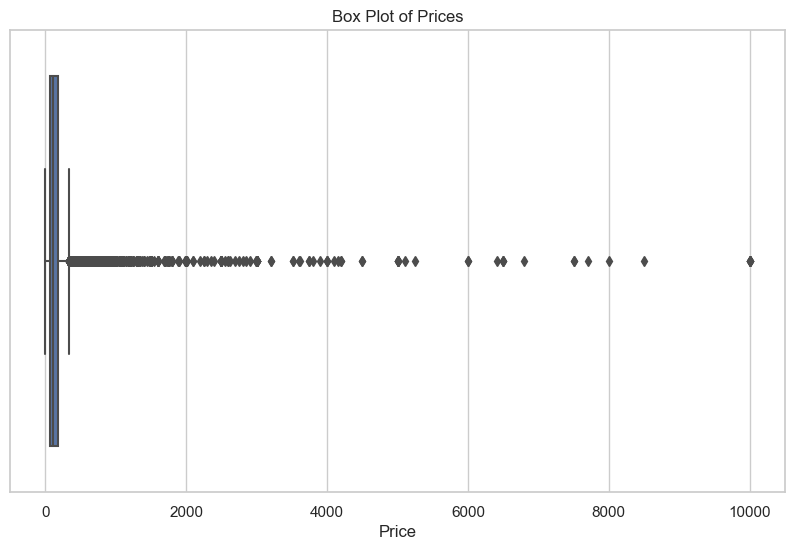

In [34]:
# Box Plot for detecting outliers in the 'price' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Prices')
plt.xlabel('Price')
plt.show()

* Scatter Plots:

    * Usage: Helpful in identifying outliers in the context of two variables.
    * Function: matplotlib.pyplot.scatter()

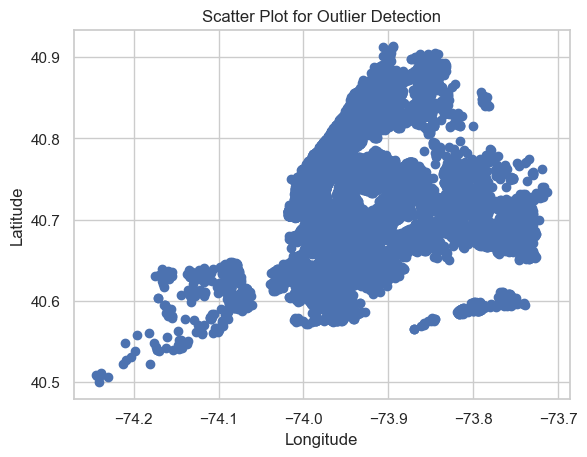

In [35]:
plt.scatter(df['longitude'], df['latitude'])
plt.title('Scatter Plot for Outlier Detection')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

* Removing Outliers. If outliers are due to errors or are few, they can be removed using:

In [36]:
# Removing outliers based on the z-score of the 'price' column
cleaned_df = df[(np.abs(stats.zscore(df['price'])) < 3)]

# Display the number of rows before and after removing outliers
print(f"Original number of rows: {len(df)}")
print(f"Number of rows after removing outliers: {len(cleaned_df)}")

# Display the first few rows of the cleaned dataframe
print(cleaned_df.head())

Original number of rows: 48895
Number of rows after removing outliers: 48507
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews la

* Capping Values. Outliers can also be capped either at a specific percentile or by replacing them with the nearest non-outlier value.


In [37]:
# Capping the 'price' values at the 95th percentile
upper_limit = df['price'].quantile(0.95)
df['price'] = np.where(df['price'] > upper_limit, upper_limit, df['price'])

# Display the first few rows of the dataframe with capped values
print(df.head())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room  149.0               1                  9  20

## In Conclusion

#### Summary of the guide:
* Step 1: Import Python Libraries
* Step 2: Reading Dataset
* Step 3: Analyzing the Data
* Step 4: Cleaning of Data set
* Step 5: Visualization
* Step 6: Correlation
* Step 7: Handling Outliers

Effective data exploration and cleaning are foundational to accurate analysis. By systematically addressing these seven aspects, we ensure data quality, uncover insights, and support robust data-driven decisions.